In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
color = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [3]:
ratings_df = pd.read_csv('../datasets/ml-latest-small/ratings.csv',engine='python',
                         encoding='latin-1',names=['user_id', 'movie_id', 'rating', 'timestamp'])

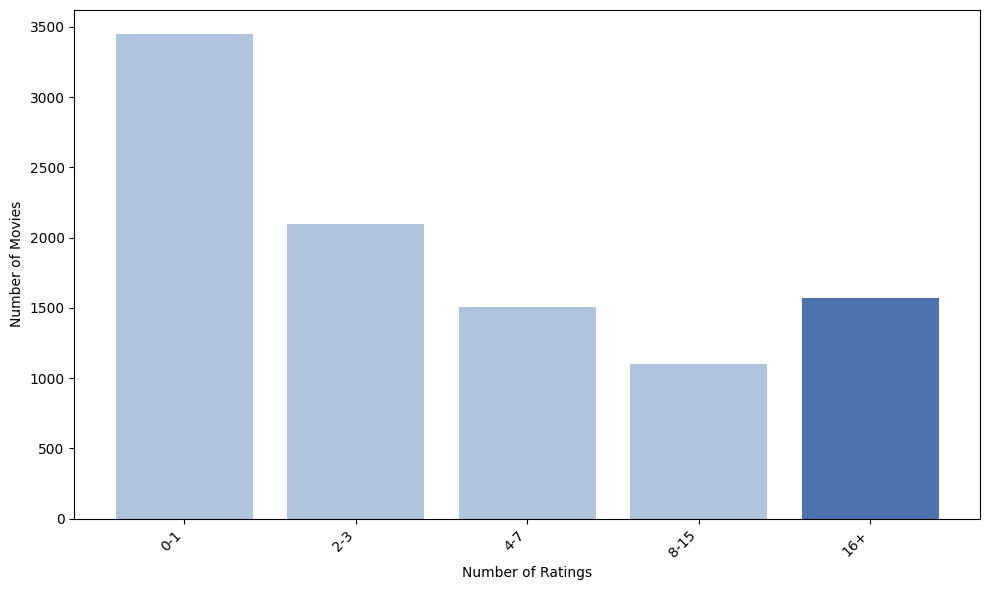

In [8]:
# Group by movie_id and count the ratings for each movie
rating_counts = ratings_df.groupby('movie_id')['rating'].count().reset_index()
rating_counts.columns = ['movie_id', 'rating_count']
sorted_rating_counts = rating_counts.sort_values(by='rating_count', ascending=False)
sorted_rating_counts

bin_edges = [0, 2, 4, 8, 16, float('inf')]
colors = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', color]

# Count how many movies fall into each bin
movie_counts, _ = np.histogram(sorted_rating_counts['rating_count'], bins=bin_edges)

# Plotting
plt.figure(figsize=(10, 6))
labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" if bin_edges[i+1] != float('inf') else f"{bin_edges[i]}+" for i in range(len(bin_edges) - 1)]
plt.bar(range(len(bin_edges) - 1), movie_counts, color=colors, width=0.8, align='center', tick_label=labels)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../plots/rating_distribution.png')

In [27]:
movie_counts/9742

array([0.35382878, 0.21535619, 0.15489633, 0.11281051, 0.16136317])

In [25]:
last_bin_count = movie_counts[-1]

# Calculate the total count of movies
total_movies = np.sum(movie_counts)

# Calculate the percentage of movies in the last bin compared to all movies
percentage_last_bin = (last_bin_count / total_movies) * 100

print(f"The last bar represents {percentage_last_bin:.2f}% of all movies.")

The last bar represents 19.04% of all movies.


# Plot the SVD results

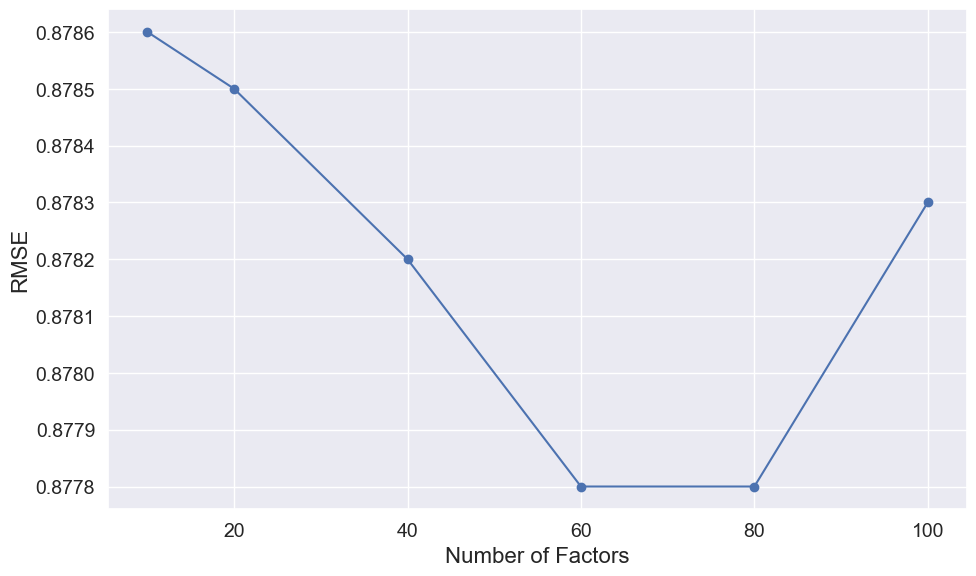

In [19]:
# Step numbers
x_axis = [10,20,40,60,80,100]

# RMSE values corresponding to each step
y_axis = [
    0.8786, 0.8785, 0.8782, 0.8778, 0.8778, 0.8783
]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.xlabel('Number of Factors', fontsize=16)
plt.ylabel('RMSE', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/svd_factors.png')

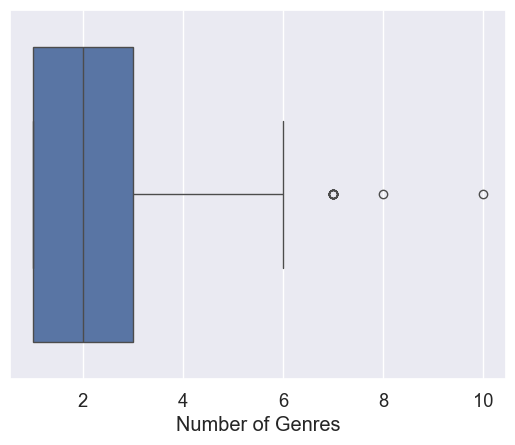

In [8]:
movies_df = pd.read_csv('../datasets/ml-imdb.csv', encoding='latin-1', sep="\t")
# Assuming the genres are in a column named 'genres' and are separated by a delimiter (e.g., comma)
# Calculate the number of genres for each movie
movies_df['num_genres'] = movies_df['genres'].apply(lambda x: len(x.split('|')))

sns.set(font_scale=1.2)

plt.xlabel("Number of Genres")
sns.boxplot(x=movies_df['num_genres'])
plt.savefig("../plots/genre_boxplot.png")

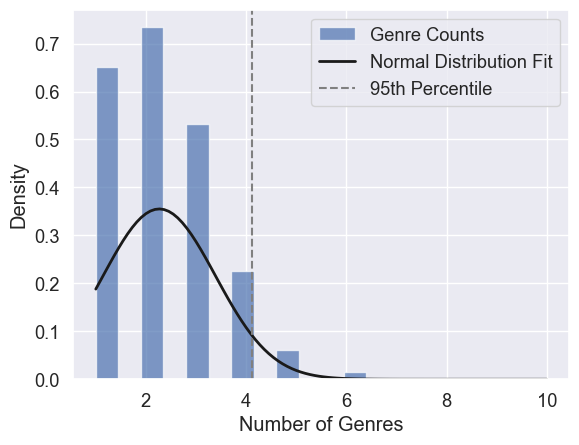

In [68]:
mean_genres = movies_df['num_genres'].mean()
std_dev_genres = movies_df['num_genres'].std()

# Fit a normal distribution to the number of genres
x = np.linspace(movies_df['num_genres'].min(), movies_df['num_genres'].max(), 100)
pdf = norm.pdf(x, mean_genres, std_dev_genres)

# Calculate the 95th percentile
percentile_95 = norm.ppf(0.95, mean_genres, std_dev_genres)

# Plot histogram of genre counts
#plt.figure(figsize=(10, 6))
plt.hist(movies_df['num_genres'], bins=20, density=True, alpha=0.7, color=color, label='Genre Counts')

# Plot normal distribution curve
plt.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution Fit')

# Highlight the 95th percentile
plt.axvline(percentile_95, color='grey', linestyle='--', label='95th Percentile')

# Add labels and title
plt.xlabel('Number of Genres')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig("../plots/genre_density.png")

In [83]:
tensors =[(-0.04691466, 0.0288954),  (-0.03245068, -0.0405336),  (0.04568703, -0.02740005),  (0.03660979, 0.02104384),  (0.02317384, 0.01383172),  (-0.03246411, -0.04387787),  (-0.04467639, 0.00601443),  (0.00031627, 0.03592953),  (0.03949952, 0.03659609),  (0.04085335, -0.03276493),  (-0.04909895, 0.03545734),  (-0.04461191, -0.04504559),  (0.01975286, 0.00439421),  (-0.01742693, 0.03427928),  (-0.03953823, -0.04258516),  (-0.01343568, -0.04745113),  (-0.00482179, -0.02605119),  (-0.00799438, 0.00180542),  (0.03306346, -0.04547932),  (-0.0255205, 0.02298551),  (0.02271633, -0.00432779),  (0.01199358, 0.00351151)]

embeddings = dict()

for index, tensor in enumerate(tensors):
    embeddings[index] = tuple(tensor)
embeddings

{0: (-0.04691466, 0.0288954),
 1: (-0.03245068, -0.0405336),
 2: (0.04568703, -0.02740005),
 3: (0.03660979, 0.02104384),
 4: (0.02317384, 0.01383172),
 5: (-0.03246411, -0.04387787),
 6: (-0.04467639, 0.00601443),
 7: (0.00031627, 0.03592953),
 8: (0.03949952, 0.03659609),
 9: (0.04085335, -0.03276493),
 10: (-0.04909895, 0.03545734),
 11: (-0.04461191, -0.04504559),
 12: (0.01975286, 0.00439421),
 13: (-0.01742693, 0.03427928),
 14: (-0.03953823, -0.04258516),
 15: (-0.01343568, -0.04745113),
 16: (-0.00482179, -0.02605119),
 17: (-0.00799438, 0.00180542),
 18: (0.03306346, -0.04547932),
 19: (-0.0255205, 0.02298551),
 20: (0.02271633, -0.00432779),
 21: (0.01199358, 0.00351151)}

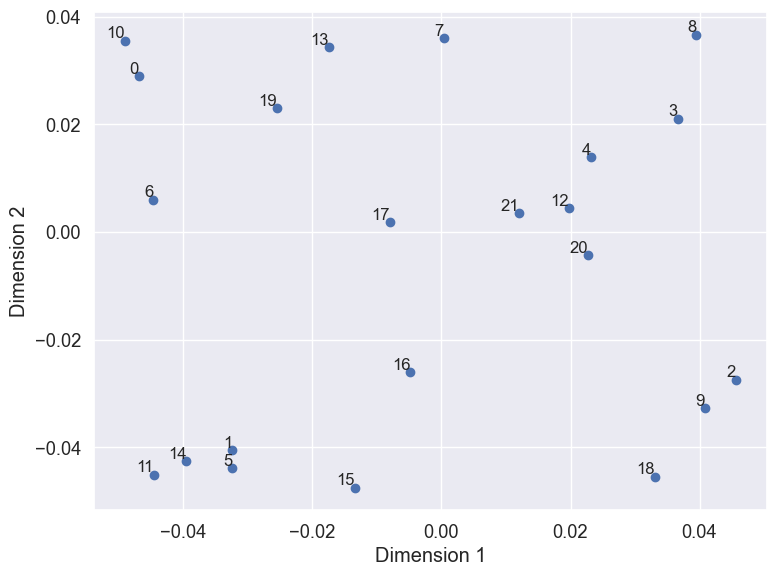

In [100]:
# Unpack embeddings
categories = list(embeddings.keys())
x = [embeddings[cat][0] for cat in categories]
y = [embeddings[cat][1] for cat in categories]

# Plot embeddings
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color=color, label='Individual Embeddings')

# Add labels
for i, cat in enumerate(categories):
    plt.text(x[i], y[i], cat, fontsize=12, ha='right', va='bottom')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/embedding_ind.png")

Average Embedding 1: [-0.03968267 -0.0058191 ]
Average Embedding 2: [ 0.0171385  -0.01923293]


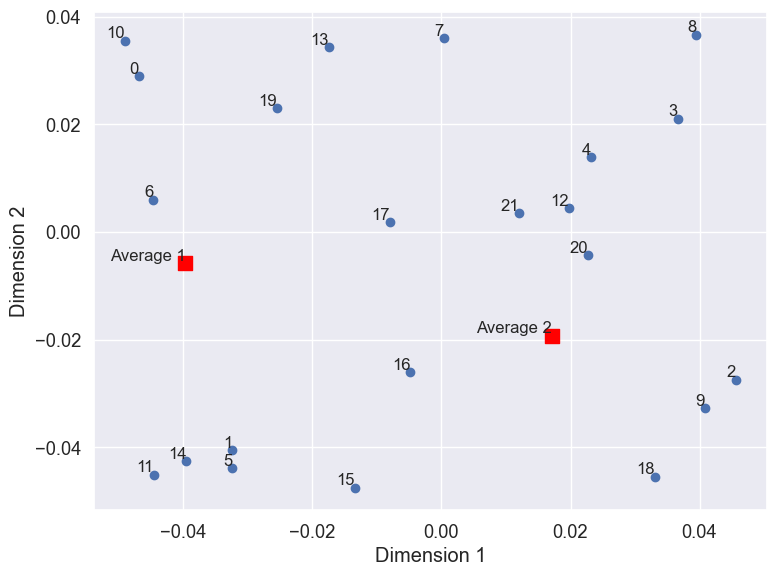

In [102]:
import numpy as np

# Calculate average embedding
avg_embedding1 = np.mean([embeddings[0], embeddings[1]], axis=0)
avg_embedding2 = np.mean([embeddings[4], embeddings[18], embeddings[16]], axis=0)
print(f'Average Embedding 1: {avg_embedding1}')
print(f'Average Embedding 2: {avg_embedding2}')

# Plot the average embedding
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color=color, label='Individual Embeddings')
plt.scatter(avg_embedding1[0], avg_embedding1[1], marker='s', color='red', s=100, label='Average Embedding 1')
plt.scatter(avg_embedding2[0], avg_embedding2[1], marker='s', color='red', s=100, label='Average Embedding 2')

# Add labels
for i, cat in enumerate(categories):
    plt.text(x[i], y[i], cat, fontsize=12, ha='right', va='bottom')
plt.text(avg_embedding1[0], avg_embedding1[1], 'Average 1', fontsize=12, ha='right', va='bottom')
plt.text(avg_embedding2[0], avg_embedding2[1], 'Average 2', fontsize=12, ha='right', va='bottom')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/embedding_avg2.png")




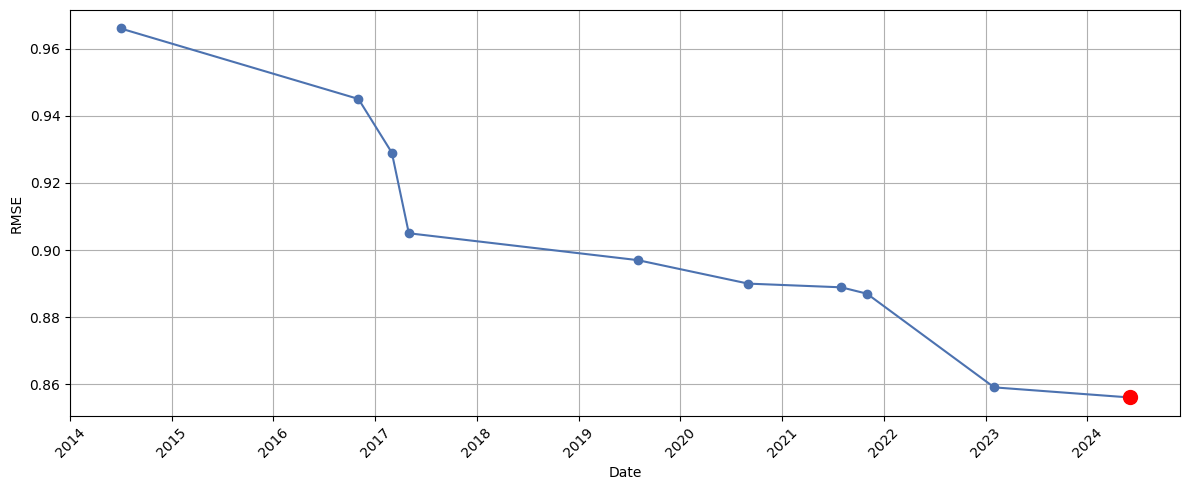

In [9]:
import datetime
import seaborn
# RMSE values
rmse_values = [0.8561, 0.8591, 0.887, 0.8889, 0.890, 0.897, 0.905, 0.929, 0.945, 0.966]

# Corresponding months and years
dates = ["6/2024", "2/2023", "11/2021", "8/2021", "9/2020", "8/2019", "5/2017", "3/2017", "11/2016", "7/2014"]

# Convert date strings to datetime objects
date_objects = [datetime.datetime.strptime(date, "%m/%Y") for date in dates]

# Create the plot
plt.figure(figsize=(12, 5))
plt.plot(date_objects, rmse_values, marker='o', linestyle='-', color=color)
plt.plot(date_objects[0], rmse_values[0], marker='o', color='r', markersize=10)
# Formatting the plot
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.savefig("../plots/goodrmse.png")

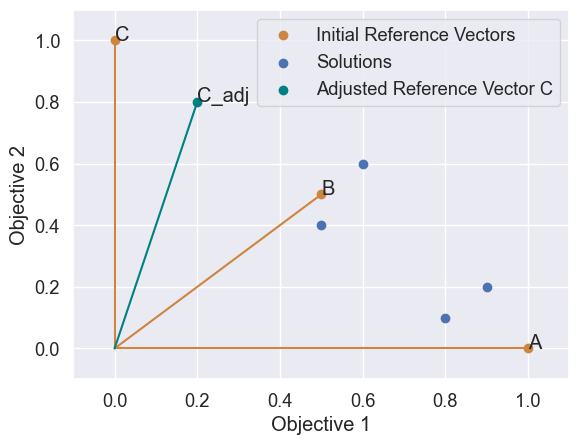

In [18]:
# Initial reference vectors
reference_vectors = np.array([
    [1, 0],
    [0.5, 0.5],
    [0, 1]
])

# Solutions closer to the first two vectors
solutions = np.array([
    [0.9, 0.2],
    [0.8, 0.1],
    [0.6, 0.6],
    [0.5, 0.4]
])

# Plot initial reference vectors
plt.scatter(reference_vectors[:, 0], reference_vectors[:, 1], color='peru', label='Initial Reference Vectors')
for i, txt in enumerate(['A', 'B', 'C']):
    plt.annotate(txt, (reference_vectors[i, 0], reference_vectors[i, 1]))

# Plot solutions
plt.scatter(solutions[:, 0], solutions[:, 1], color=color, label='Solutions')

# Adjust the third reference vector to a more balanced position
adjusted_reference_vec = np.array([0.2, 0.8])
plt.scatter(adjusted_reference_vec[0], adjusted_reference_vec[1], color='teal', label='Adjusted Reference Vector C')
plt.annotate('C_adj', (adjusted_reference_vec[0], adjusted_reference_vec[1]))

# Plot lines from origin to reference vectors
origin = np.array([0, 0])
for vec in reference_vectors:
    plt.plot([origin[0], vec[0]], [origin[1], vec[1]], 'peru')

# Plot line from origin to adjusted reference vector
plt.plot([origin[0], adjusted_reference_vec[0]], [origin[1], adjusted_reference_vec[1]], 'teal')

# Set plot limits, labels, and legend
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
#plt.title('Adjustment of Reference Vectors in a 2-Objective Space')
plt.legend()
plt.grid(True)
plt.savefig("../plots/refvec.png")